Grant King

# Scraped the data from the [Pepperstone ATP Rankings](https://www.atptour.com/en/rankings/singles?rankRange=1-5000&rankDate=2023-01-02). Data current as of 01/07/2023. The website's table provides us with the player names, ranks, and ages, as well as the ATP points and tournaments played for the year. Also, each row of the website's table links to the player's individual profile, which must also be scraped to provide us with their year turned pro, weight, height, birthplace, playstyle, coach, and federation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import warnings
warnings.filterwarnings('ignore')

In [ ]:
r = requests.get('https://www.atptour.com/en/rankings/singles?rankRange=1-5000&rankDate=2023-01-02')
soup = bs(r.content)

table = soup.find('table')
table_headers = table.find_all('th')
columns = []

for table_header in table_headers:
    columns.append(table_header.get_text().strip())

In [ ]:
table_rows = table.find_all('tr')[1:1001]
rows = []

for table_row in table_rows:
    cells = table_row.find_all('td')
    row = [cell.get_text().strip() for cell in cells]
    rows.append(row)

In [ ]:
links = []

for table_row in table_rows:
    link = table_row.find('a')['href']
    links.append(link)

In [ ]:
# I ran this iteratively instead of as is while constructing the final table
rows_continued = []

for link in links:
    r = requests.get('https://www.atptour.com' + link)
    soup = bs(r.content)
    
    federation = soup.find('div', attrs={'class': 'player-flag-code'})
    
    if federation:
        federation = federation.string
    else:
        federation = ''
    
    table = soup.find('table')
    
    cells = table.find_all('td')[1:-1]
    
    row_continued = [cell.get_text().replace('\n', '').replace('\r', '') for cell in cells]
    
    row_continued[0] = row_continued[0].replace('Turned Pro', '').strip()
    row_continued[1] = row_continued[1].split('l')[0].replace('Weight', '')
    height = row_continued[2].split("\'")
    
    try:
        row_continued[2] = int(height[0][-1]) * 12 + int(height[1].split('"')[0])
    except:
        row_continued[2] = ''
    
    row_continued[3] = row_continued[3].replace('Birthplace', '').strip()
    row_continued[4] = row_continued[4].replace('Plays', '').strip()
    row_continued[5] = row_continued[5].replace('Coach', '').strip()
    
    row_continued.append(federation)
    rows_continued.append(row_continued)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

df = pd.DataFrame(rows, columns=columns)
df2 = pd.DataFrame(rows_continued, columns=['Turned Pro', 'Weight', 'Height', 'Birthplace', 'Plays', 'Coach', 'Federation'])
df = pd.concat([df, df2], axis=1)

df.to_csv('Scraped - Association of Tennis Professionals top 1000 singles players', index=False) # Scraped table in GitHub

# Beginning of exploratory analysis

In [2]:
df = pd.read_csv('Scraped - Association of Tennis Professionals top 1000 singles players', thousands=',')

df.head()

,Rank,+/- Rank,Unnamed: 2,Player,Age,Points,+/- Points,Tourn Played,Dropping,Next Best,Turned Pro,Weight,Height,Birthplace,Plays,Coach,Federation
0,1,NaN,NaN,Carlos Alcaraz,19.0,6820,NaN,17,0,0,2018.0,163.0,72.0,"El Palmar, Murcia, Spain","Right-Handed, Two-Handed Backhand",Juan Carlos Ferrero,ESP
1,2,NaN,NaN,Rafael Nadal,36.0,6020,NaN,14,250,0,2001.0,187.0,73.0,"Manacor, Mallorca, Spain","Left-Handed, Two-Handed Backhand","Carlos Moya, Marc Lopez, Gustavo Marcaccio",ESP
2,3,NaN,NaN,Casper Ruud,24.0,5820,NaN,23,125,0,2015.0,170.0,72.0,"Oslo, Norway","Right-Handed, Two-Handed Backhand",Christian Ruud,NOR
3,4,NaN,NaN,Stefanos Tsitsipas,24.0,5550,NaN,23,60,45,2016.0,198.0,76.0,"Athens, Greece","Right-Handed, One-Handed Backhand",Apostolos Tsitsipas,GRE
4,5,NaN,NaN,Novak Djokovic,35.0,4820,NaN,14,0,0,2003.0,170.0,74.0,"Belgrade, Serbia","Right-Handed, Two-Handed Backhand",Goran Ivanisevic,SRB


In [3]:
df.tail()

,Rank,+/- Rank,Unnamed: 2,Player,Age,Points,+/- Points,Tourn Played,Dropping,Next Best,Turned Pro,Weight,Height,Birthplace,Plays,Coach,Federation
995,996,NaN,NaN,Fabio Coelho,22.0,11,NaN,14,0,0,NaN,151.0,69.0,Oliveira de Azeméis,"Right-Handed, Two-Handed Backhand","João Maio, Eduardo Rodrigues",POR
996,997,NaN,NaN,Guy Orly Iradukunda,26.0,11,NaN,15,0,0,NaN,167.0,0.0,Gitega,"Right-Handed, Unknown Backhand",NaN,BDI
997,998,NaN,NaN,Sebastian Sorger,17.0,11,NaN,15,0,0,NaN,NaN,NaN,NaN,"Right-Handed, Unknown Backhand",NaN,AUT
998,999,NaN,NaN,Ignasi De Rueda De Genover,24.0,11,NaN,17,0,0,NaN,165.0,72.0,"Barcelona, Spain","Right-Handed, Two-Handed Backhand",NaN,ESP
999,1000,NaN,NaN,Isaiah Strode,25.0,11,NaN,17,0,0,NaN,165.0,72.0,San Diego,"Right-Handed, Two-Handed Backhand",NaN,USA


In [4]:
df.isnull().sum()

Rank               0
+/- Rank         516
Unnamed: 2      1000
Player             0
Age                1
Points             0
+/- Points       947
Tourn Played       0
Dropping           0
Next Best          0
Turned Pro       630
Weight            90
Height            94
Birthplace        86
Plays             62
Coach            346
Federation        36
dtype: int64

# Cleaning the data

In [5]:
df.drop(columns=['Unnamed: 2', '+/- Rank', '+/- Points', 'Dropping', 'Next Best'], inplace=True)
df.shape

(1000, 12)

### Observations: It appears an age was missed while scraping, as well as 4 heights (assuming the other 90 are unlisted on the website). Also, the points and tournaments played data aren't floats. Manually checking those:

In [6]:
df.Points = df.Points.astype('float64')
df['Tourn Played'] = df['Tourn Played'].astype('float64')

df.loc[df.Age.isnull() == True]

,Rank,Player,Age,Points,Tourn Played,Turned Pro,Weight,Height,Birthplace,Plays,Coach,Federation
985,986,Luca Wiedenmann,NaN,11.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,GER


### This player's age is actually [unlisted](https://www.atptour.com/en/players/luca-wiedenmann/w09t/overview).

In [7]:
df.loc[(~df.Weight.isnull()) & (df.Height.isnull())]

,Rank,Player,Age,Points,Tourn Played,Turned Pro,Weight,Height,Birthplace,Plays,Coach,Federation
170,171,Flavio Cobolli,20.0,335.0,30.0,2020.0,156.0,NaN,"Florence, Italy","Right-Handed, Two-Handed Backhand",Stefano Cobolli,ITA
237,238,Roman Andres Burruchaga,20.0,229.0,30.0,NaN,176.0,NaN,"Buenos Aires, Argentina","Right-Handed, Unknown Backhand",Mariano Hood,ARG
286,287,Joao Domingues,29.0,179.0,26.0,2013.0,154.0,NaN,"Oliveira de Azemeis, Portugal","Right-Handed, Two-Handed Backhand","Joao Antunes, Andre Podalka",POR
318,319,Shintaro Mochizuki,19.0,159.0,25.0,NaN,154.0,NaN,"Kawasaki, Japan","Right-Handed, Two-Handed Backhand",NaN,JPN
357,358,Daniel Cukierman,27.0,132.0,24.0,NaN,154.0,NaN,"Tel Aviv, Israel","Right-Handed, Two-Handed Backhand",NaN,ISR
889,890,Juan Manuel Benitez Chavarriaga,27.0,15.0,7.0,NaN,170.0,NaN,"Medellin, Colombia","Right-Handed, Two-Handed Backhand",Jean-Luc Fontanot,COL


### These players' heights are actually unlisted. Double checking if there are missing weights:

In [8]:
df.loc[(df.Weight.isnull()) & (~df.Height.isnull())]

,Rank,Player,Age,Points,Tourn Played,Turned Pro,Weight,Height,Birthplace,Plays,Coach,Federation
196,197,Kaichi Uchida,28.0,282.0,32.0,2012.0,NaN,71.0,NaN,"Right-Handed, Two-Handed Backhand",Norberto Valsecchi,JPN
426,427,Juan Pablo Paz,27.0,104.0,27.0,NaN,NaN,67.0,NaN,"Right-Handed, Two-Handed Backhand",Marcelo Garcia - Daniel Paz,ARG


### These players' weights are unlisted. Weights and heights of 0 should be NaN, and obvious errors removed:

In [9]:
df.Weight.replace(to_replace=0, value=np.nan, inplace=True)
df.Height.replace(to_replace=0, value=np.nan, inplace=True)
df.Weight.replace(to_replace=[75, 283, 290, 396], value=np.nan, inplace=True)
df.Height.replace(to_replace=[1, 6, 25], value=np.nan, inplace=True)

df.describe()

,Age,Points,Tourn Played,Turned Pro,Weight,Height
count,999.000000,1000.000000,1000.000000,370.000000,904.000000,893.000000
mean,24.931932,242.997000,19.191000,2012.694595,172.332965,72.662934
std,4.512216,579.930724,6.992812,4.960683,14.534062,2.625236
min,16.000000,11.000000,1.000000,1997.000000,132.000000,61.000000
25%,22.000000,27.750000,14.000000,2009.000000,162.000000,71.000000
50%,24.000000,71.000000,20.000000,2013.000000,172.000000,73.000000
75%,28.000000,213.250000,24.000000,2016.000000,181.000000,74.000000
max,41.000000,6820.000000,39.000000,2022.000000,238.000000,83.000000


### Observations: The mean age of the top 1000 players is 24.9319, the youngest being 16 and the oldest being 41. The mean number of tournaments played this year is 19, the highest being 39. Of the players who went pro, the earliest year to do so is 1997. The mean weight is 172.3330, and the mean height 72.6629, the lowest being 5'01" and the highest being 6'11.

In [10]:
df.to_csv('Final - Association of Tennis Professionals top 1000 singles players', index=False) # Final table in GitHub

# Visualization

### Question: *What is the correlation matrix of ATP points (which control rank), age, weight, and height?*

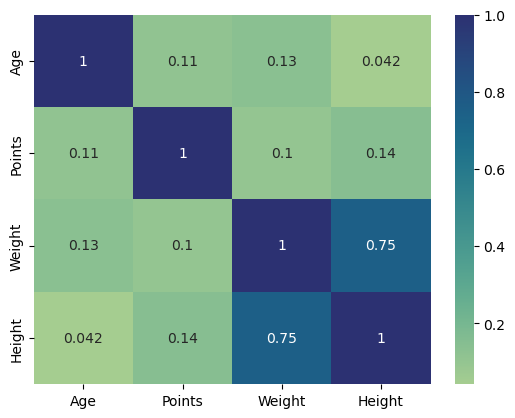

In [11]:
correlation = df.corr()
correlation.drop(columns=['Tourn Played', 'Turned Pro'], inplace=True)
correlation.drop(labels=['Tourn Played', 'Turned Pro'], axis=0, inplace=True)
correlation

heatmap = sns.heatmap(data=correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='crest')

### There is a slightly stronger positive correlation between points and height than between points and weight (serving advantage is a consideration), but overall, tennis players of all ages, weights, and heights are spread evenly throughout the top 1000.

### Question: *How do ATP points vary by the top 15 most popular federations?*

In [12]:
top_15 = df.groupby(['Federation']).count().sort_values('Rank', ascending=False).head(15).index.tolist()

In [13]:
new_df = df.copy(deep=True)

for row, federation in enumerate(new_df.Federation):
    if federation not in top_15:
        new_df = new_df.drop(labels=row, axis=0)

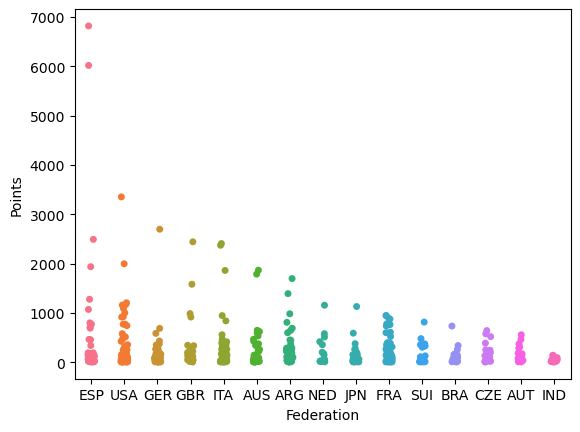

In [14]:
strip_plot = sns.stripplot(data=new_df, x=new_df.Federation, y=new_df.Points, palette='husl')

### Spain is absolutely dominating the competition with powerful outliers like Carlos Alcaraz and Rafael Nadal.

### Question: *What is the physical composition of the players on tour?*

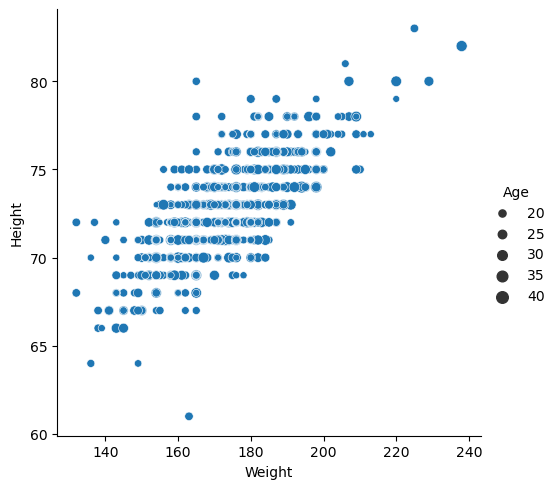

In [15]:
scatterplot = sns.relplot(data=df, x=df.Weight, y=df.Height, size=df.Age)

### In the top 100, Diego Schwartzman is 5'7" and rank 25, while Reilly Opelka is 6'11" ranking 38th.

### Question: *What is the proportion of each backhand style among right-handed and left-handed players?*

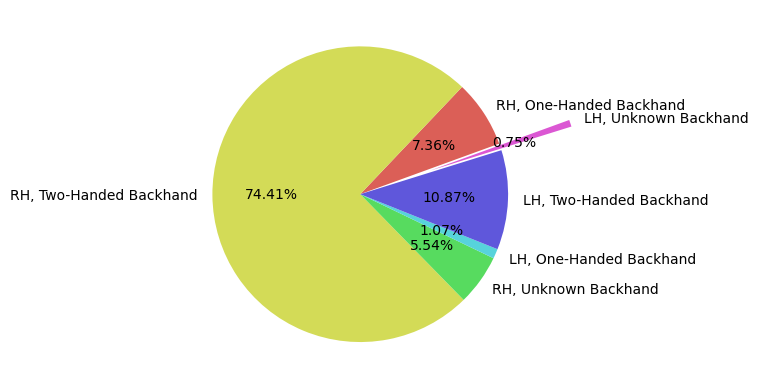

In [16]:
counts = df.groupby('Plays').count()['Rank'].tolist()
counts = counts[3:] + counts[:3]
labels = ['RH, One-Handed Backhand', 'RH, Two-Handed Backhand', 'RH, Unknown Backhand', 'LH, One-Handed Backhand', 'LH, Two-Handed Backhand', 'LH, Unknown Backhand', ]
colors = sns.color_palette('hls')

pie_chart = plt.pie(counts, labels=labels, autopct='%.2f%%', colors=colors, explode=[0, 0, 0, 0, 0, 0.5], startangle=20)

### One-handed backhanders are relatively uncommon, which makes players like Stefanos Tsitsipas stand out as a one-handed backhander in the top 10.

### Question: *How do seasoned pros compare to newer arrivals on the scene?*

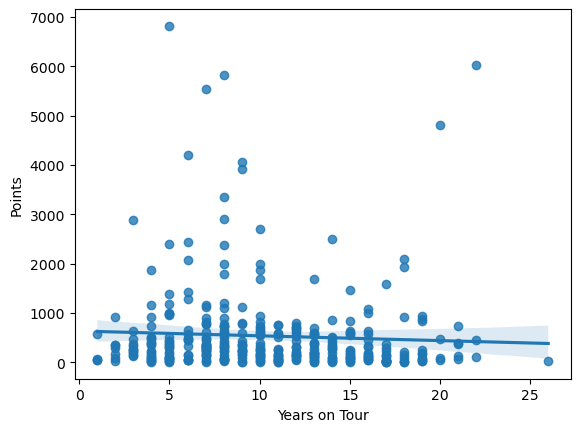

In [17]:
years_on_tour = [2023 - year for year in df['Turned Pro']]
df['Years on Tour'] = years_on_tour

scatterplot = sns.regplot(data=df, x=df['Years on Tour'], y=df.Points)

### In the ATP top 1000, experience can certainly compete with youth.